In [1]:
'''
Samuel Grant 2023

Working on understanding the track cuts in MeasureModuleEfficiency.py. 

They're not behaving as I expect.

'''

"\nSamuel Grant 2023\n\nWorking on understanding the track cuts in MeasureModuleEfficiency.py. \n\nThey're not behaving as I expect.\n\n"

In [2]:
# External
import os
import sys
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut
import PrintUtils as pr

In [3]:
# Plot2D helper
def Plot2D(x, y, nbinsX=100, xmin=-1.0, xmax=1.0, nbinsY=100, ymin=-1.0, ymax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", log=False, cb=True, NDPI=300):

    # Filter out empty entries from x and y
    valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

    # Extract valid data points based on the indices
    x = [x[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]

    # Check if the input arrays are not empty and have the same length
    if len(x) == 0 or len(y) == 0:
        print("Input arrays are empty.")
        return
    if len(x) != len(y):
        print("Input arrays x and y have different lengths.")
        return

    # Create 2D histogram
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

    # Set up the plot
    fig, ax = plt.subplots()

    norm = colors.Normalize(vmin=0, vmax=np.max(hist))  
    if log: norm = colors.LogNorm(vmin=1, vmax=np.max(hist)) 

    # Plot the 2D histogram
    im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)  # , vmax=np.max(hist), norm=colors.LogNorm())
    # im = ax.imshow(hist.T, extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', vmax=np.max(hist))

    # Add colourbar
    if cb: plt.colorbar(im)

    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    ut.ScientificNotation(ax)

    plt.show()
    
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("\n---> Written:\n\t", fout)

In [4]:
fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00038/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000006.root"
finTag = fileName.split('.')[-2] 
with uproot.open(fileName) as file:
    data_ = ut.GetData(file)

In [5]:
# Basic config 
recon="MDC2020ae"
PE=10
particle="all"
layer=3

-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 6
evtinfo.event: 229
***** crv *****
crvcoincs.sectorType: []
crvcoincs.nLayers []
crvcoincs.angle: []
crvcoincs.pos.fCoordinates: ([], [], [])
crvcoincs.timeStart: []
crvcoincs.time: []
crvcoincs.PEs: []
crvcoincs.PEsPerLayer[4]: []
crvcoincs.nHits: []
crvcoincsmc.pdgId: []
crvcoincsmc.valid: []
crvcoincsmc.primaryE: []
***** trk *****
kl.status: [1]
kl.nactive: [20]
kl.nhits: [20]
kl.nplanes: [8]
kl.nnullambig: [2]
kl.ndof: [35]
kl.kl.fitcon: [0.196]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 4.19e+04, ...}, ..., {...}]]
klfit.sid: [[0, 2, 4, 4, 4, 200, 200, 200]]
klfit.sindex: [[0, 0, 0, 0, 0, 0, 1, 2]]
klkl: [[{d0: -539, phi0: -1.62, z0: 520, theta: 2.28, mom: 2e+03, t0: ..., ...}, ...]]
klkl.z0err: [[0.218, 0.238, 0.238, 0.218, 0.218, 0.238, 0.238, 0.238]]
klkl.d0err: [[0.101, 0.113, 0.113, 0.101, 0.101, 0.113, 0.11

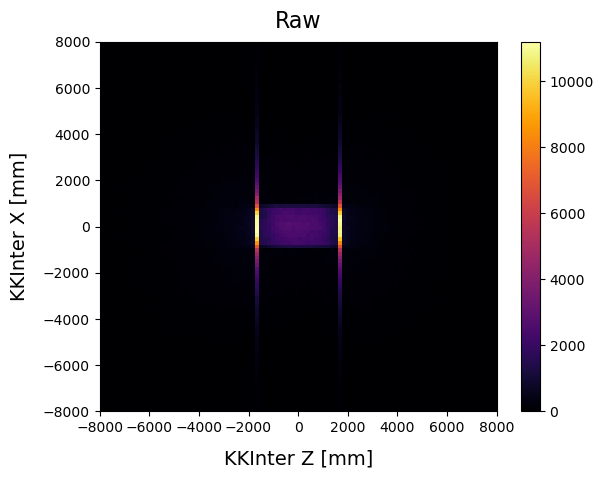


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_raw.png


<Figure size 640x480 with 0 Axes>

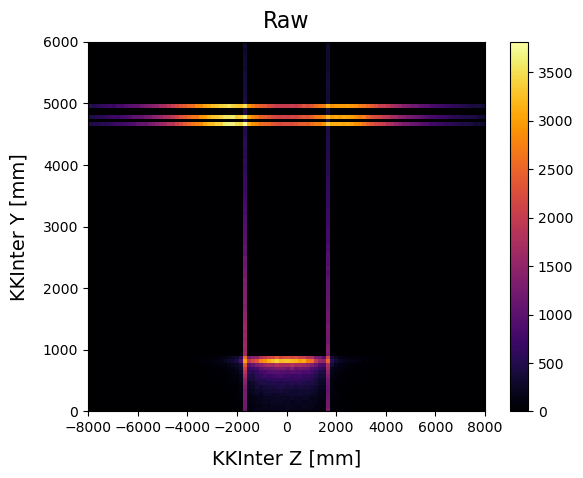


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_raw.png


<Figure size 640x480 with 0 Axes>

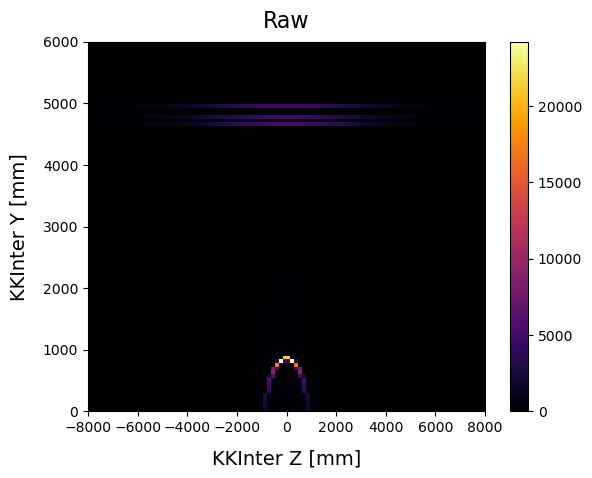


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_raw.png


<Figure size 640x480 with 0 Axes>

In [6]:
'''
No nothin
'''

ut.PrintNEvents(data_, 1)

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
         , fout=f"../Images/{recon}/TrackCuts//h2_ZX_raw.png")

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
         , fout=f"../Images/{recon}/TrackCuts/h2_ZY_raw.png")

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
         , fout=f"../Images/{recon}/TrackCuts//h2_XY_raw.png")

In [7]:
# Events at the end of the digitisation window get messed up
# Cut on start time 
def CutOnStartTime(data_, quiet=False): 
    if not quiet: print(f"\n---> Cutting on start time")
    startTimeCondition = ak.all(data_["crv"]["crvcoincs.timeStart"] <= 99500, axis=1)
    return data_[startTimeCondition]
    
data_ = CutOnStartTime(data_)


---> Cutting on start time


In [8]:
# Filter particles
def FilterParticles(data_, particle, quiet=False):
    if not quiet: print(f"\n---> Filtering particles, keeping {particle}")
    
    muonCondition = ak.any((data_["crv"]["crvcoincsmc.pdgId"] == 13) | (data_["crv"]["crvcoincsmc.pdgId"] == -13), axis=1)
    if particle == "all":
        return data_
    elif particle == "muons": 
        return data_[muonCondition] 
    elif particle == "non_muons":
        return data_[~muonCondition] 
    else:
        raise ValueError(f"Particle string {particle} not valid!")
        
data_ = FilterParticles(data_, particle)


---> Filtering particles, keeping all


In [9]:
# Apply track cuts
def ApplyTrackerCuts(data_, fail, quiet=False):
    
    if not quiet: print(f"\n---> Applying tracker cuts") 
    
    data_["trkfit_KLCRV1"] = ( 
        (data_["trkfit"]["klfit"]["sid"] == 200) 
        & (data_["trkfit"]["klfit"]["sindex"] == 1) )

    data_["trk_bestFit"] = ( 
        (data_["trk"]["kl.ndof"] >= 10)
        & (data_["trk"]["kl.fitcon"] > 0.1)
        & ((data_["trk"]["kl.nactive"]/data_["trk"]["kl.nhits"]) > 0.99)
        & (data_["trk"]["kl.nplanes"] >= 4)
        & ((data_["trk"]["kl.nnullambig"]/data_["trk"]["kl.nhits"]) < 0.2) )
    
    data_["trkfit_bestFit"] = ( 
        (data_["trkfit"]["klkl"]["z0err"] < 1) 
        & (data_["trkfit"]["klkl"]["d0err"] < 1) 
        & (data_["trkfit"]["klkl"]["thetaerr"] < 0.004)
        & (data_["trkfit"]["klkl"]["phi0err"] < 0.001) )

    # Apply cuts on the track and track fit level
    if not fail: 
        data_["trkfit"] = data_["trkfit"][(data_["trkfit_bestFit"] & data_["trkfit_KLCRV1"])]
        data_["trk"] = data_["trk"][data_["trk_bestFit"]]
    else: 
        data_["trkfit"] = data_["trkfit"][~(data_["trkfit_bestFit"] & data_["trkfit_KLCRV1"])]
        data_["trk"] = data_["trk"][~data_["trk_bestFit"]]

    # These cuts are applied to trk and trkfit, events that fail will now have no track cut informatio.
    # Mark events which still have tracks or track fits after cuts
    data_["goodTrk"] = ak.any(data_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
    data_["goodTrkFit"] = (
        (ak.count(data_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
        & (ak.count(data_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    # Reset to event level
    data_["goodTrkFit"] = ak.any(data_["goodTrkFit"], axis=-1, keepdims=False) == True 

    # Mark total track cuts
    data_["pass_track_cuts"] = (data_["goodTrk"] & data_["goodTrkFit"])

    # Return events passing/failing track fits
    if not fail:  
        return data_[data_["pass_track_cuts"]]
    else:
        return data_[~data_["pass_track_cuts"]]

# data_ = ApplyTrackerCuts(data_, fail=False)

In [10]:
# Filters
filters_ = { 
    0 : "singles"
    , 1 : "track_cuts"
    , 2 : "singles_track_cuts"
    # , 3 : "pass_singles_fail_track_cuts" # this is where the supposed improvement comes in. 
    , 4 : "fail_singles_pass_track_cuts"
    , 5 : "fail_singles_fail_track_cuts"
}


---> Applying tracker cuts
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 6
evtinfo.event: 229
***** crv *****
crvcoincs.sectorType: []
crvcoincs.nLayers []
crvcoincs.angle: []
crvcoincs.pos.fCoordinates: ([], [], [])
crvcoincs.timeStart: []
crvcoincs.time: []
crvcoincs.PEs: []
crvcoincs.PEsPerLayer[4]: []
crvcoincs.nHits: []
crvcoincsmc.pdgId: []
crvcoincsmc.valid: []
crvcoincsmc.primaryE: []
***** trk *****
kl.status: [1]
kl.nactive: [20]
kl.nhits: [20]
kl.nplanes: [8]
kl.nnullambig: [2]
kl.ndof: [35]
kl.kl.fitcon: [0.196]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 4.18e+04, momerr: ..., ...}]]
klfit.sid: [[200]]
klfit.sindex: [[1]]
klkl: [[{d0: -539, phi0: -1.62, z0: 521, theta: 2.28, mom: 2e+03, t0: 4.18e+04, ...}]]
klkl.z0err: [[0.238]]
klkl.d0err: [[0.113]]
klkl.thetaerr: [[0.000306]]
klkl.phi0err: [[0.000425]]
-------------------------------------------------

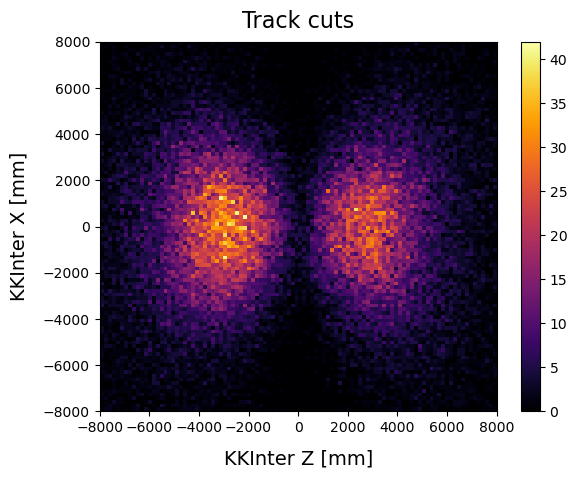


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZX_track_cuts.png


<Figure size 640x480 with 0 Axes>

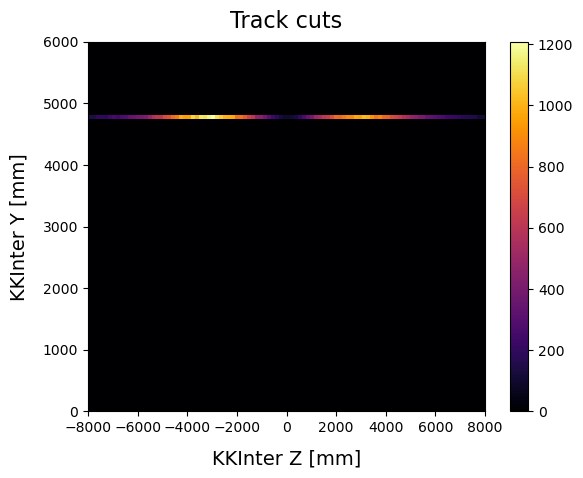


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZY_track_cuts.png


<Figure size 640x480 with 0 Axes>

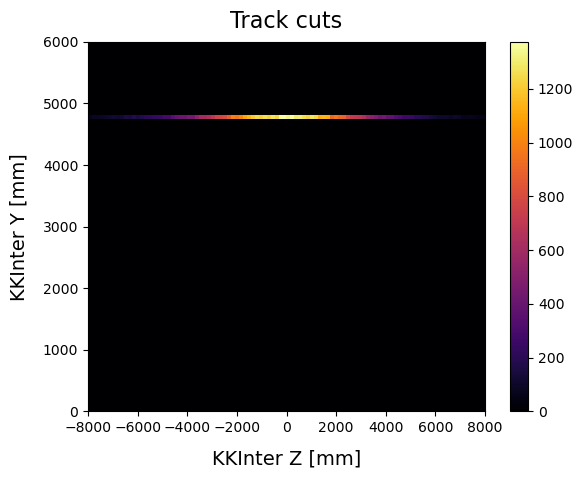


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_XY_track_cuts.png


<Figure size 640x480 with 0 Axes>

In [12]:
'''
Track cuts only
'''

track_cuts_ = ApplyTrackerCuts(data_, fail=False)

ut.PrintNEvents(track_cuts_, 1)

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_XY_track_cuts.png")

-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 6
evtinfo.event: 5143
***** crv *****
crvcoincs.sectorType: [1]
crvcoincs.nLayers [3]
crvcoincs.angle: [0.33]
crvcoincs.pos.fCoordinates: ([1.47e+03], [4.75e+03], [1.09e+03])
crvcoincs.timeStart: [5.43e+04]
crvcoincs.time: [5.43e+04]
crvcoincs.PEs: [340]
crvcoincs.PEsPerLayer[4]: [[167, 136, 36.5, 0]]
crvcoincs.nHits: [12]
crvcoincsmc.pdgId: [-13]
crvcoincsmc.valid: [True]
crvcoincsmc.primaryE: [1.08e+04]
***** trk *****
kl.status: [1]
kl.nactive: [26]
kl.nhits: [26]
kl.nplanes: [5]
kl.nnullambig: [0]
kl.ndof: [47]
kl.kl.fitcon: [0.923]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 5.43e+04, momerr: ..., ...}]]
klfit.sid: [[200]]
klfit.sindex: [[1]]
klkl: [[{d0: -513, phi0: -1.87, z0: -1.13e+03, theta: 2.01, mom: 2e+03, ...}]]
klkl.z0err: [[0.179]]
klkl.d0err: [[0.139]]
klkl.thetaerr: [[0.000281]]
klkl.phi0err: [[0.000473]]

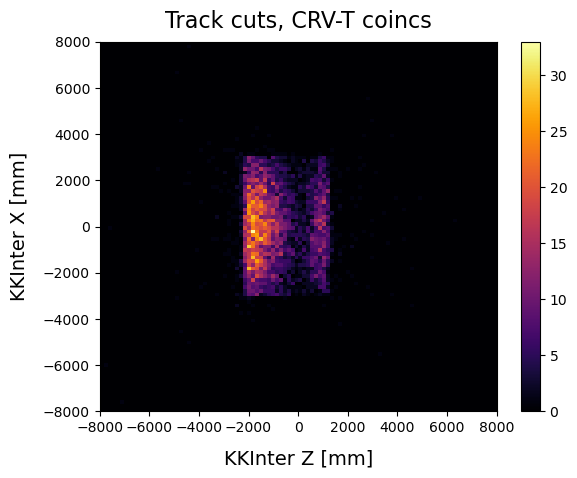


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZX_track_cuts_CRVT.png


<Figure size 640x480 with 0 Axes>

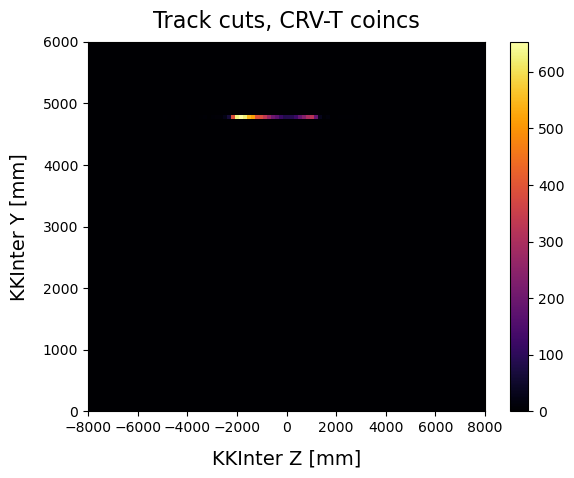


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZY_track_cuts_CRVT.png


<Figure size 640x480 with 0 Axes>

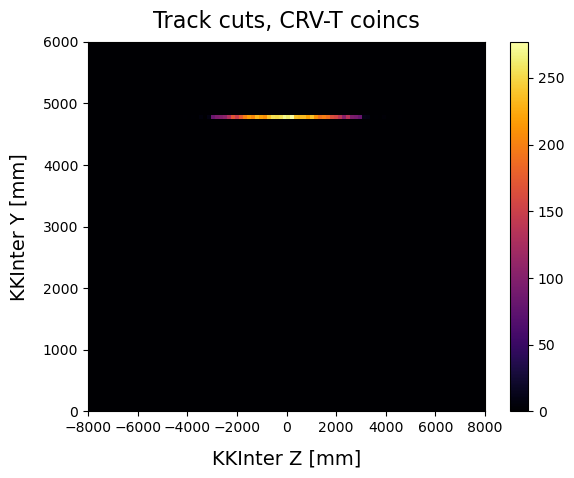


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_XY_track_cuts_CRVT.png


<Figure size 640x480 with 0 Axes>

In [13]:
'''
Track cuts (CRV-T coinc)
'''
track_cuts_CRVT_ = ak.copy(track_cuts_)
track_cuts_CRVT_["crv"] = track_cuts_CRVT_["crv"][track_cuts_CRVT_["crv"]["crvcoincs.sectorType"] == 1]

# Now remove events with no coincidence
# We actually do not do this directly in main code, although I do trigger which should do it?
goodCRV =  ak.any(track_cuts_CRVT_["crv"]["crvcoincs.nHits"], axis=1, keepdims=False) > 0
track_cuts_CRVT_ = track_cuts_CRVT_[goodCRV]

ut.PrintNEvents(track_cuts_CRVT_, 1)

Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, CRV-T coincs", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts_CRVT.png")

Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, CRV-T coincs", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts_CRVT.png")

Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, CRV-T coincs", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_XY_track_cuts_CRVT.png")


---> Triggering
Done!
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 6
evtinfo.event: 140306
***** crv *****
crvcoincs.sectorType: [1, 2, 3]
crvcoincs.nLayers [4, 4, 3]
crvcoincs.angle: [0.326, -4.66e-12, 0.327]
crvcoincs.pos.fCoordinates: ([-454, -337, -381], [4.77e+03, 4.62e+03, 4.91e+03], [223, -437, 271])
crvcoincs.timeStart: [8.03e+04, 8.03e+04, 8.03e+04]
crvcoincs.time: [8.03e+04, 8.03e+04, 8.03e+04]
crvcoincs.PEs: [517, 455, 401]
crvcoincs.PEsPerLayer[4]: [[141, 145, 95.7, 135], [110, 126, 118, 101], [129, 124, 148, 0]]
crvcoincs.nHits: [16, 8, 12]
crvcoincsmc.pdgId: [-13, -13, -13]
crvcoincsmc.valid: [True, True, True]
crvcoincsmc.primaryE: [2.92e+03, 2.92e+03, 2.92e+03]
***** trk *****
kl.status: [1]
kl.nactive: [17]
kl.nhits: [17]
kl.nplanes: [4]
kl.nnullambig: [0]
kl.ndof: [29]
kl.kl.fitcon: [0.628]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 8.03e+04, mom

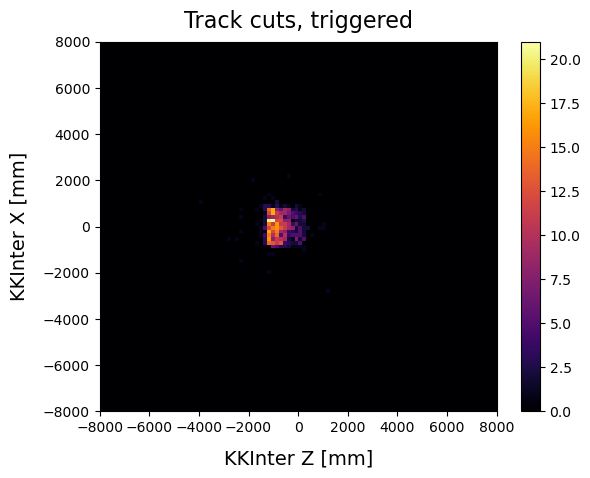


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZX_track_cuts_triggered.png


<Figure size 640x480 with 0 Axes>

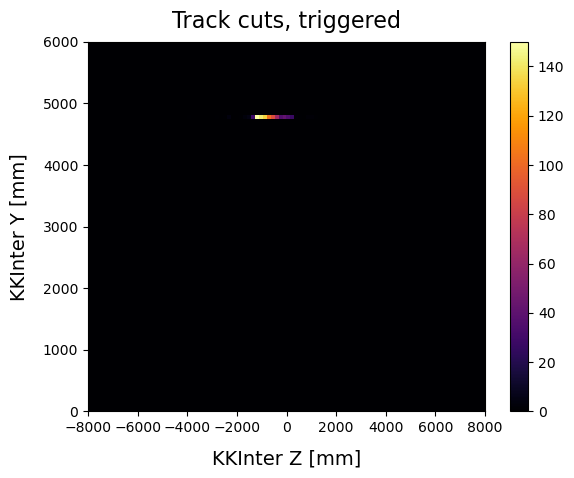


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZY_track_cuts_triggered.png


<Figure size 640x480 with 0 Axes>

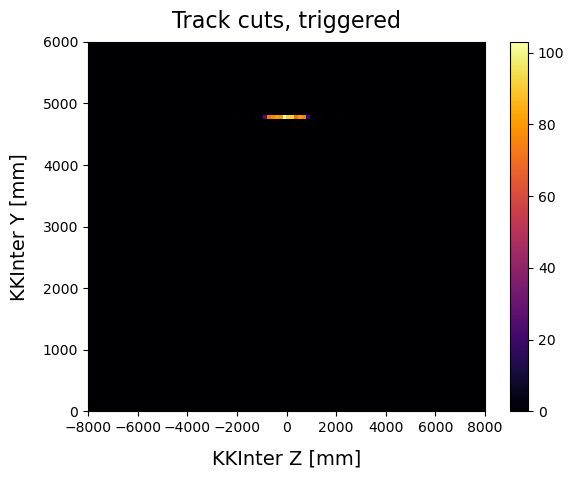


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_XY_track_cuts_triggered.png


<Figure size 640x480 with 0 Axes>

In [14]:
'''
Now introduce the trigger
'''

def Trigger(data_, fail=False, quiet=False): 

    if not quiet: print(f"\n---> Triggering")

    # Enforce basic trigger condition
    # triggerCondition = (
    #     ak.any(data_["is_coincidence"] & (data_["crv"]["crvcoincs.sectorType"] == 2), axis=1) &
    #     ak.any(data_["is_coincidence"] & (data_["crv"]["crvcoincs.sectorType"] == 3), axis=1)
    # )

    # Leave the trigger sectors at 2 layers and 10 PEs. 
    triggerCondition = (
        ak.any((data_["crv"]["crvcoincs.sectorType"] == 2), axis=1) &
        ak.any((data_["crv"]["crvcoincs.sectorType"] == 3), axis=1)
    )

    data_["pass_trigger"] = triggerCondition
    
    if not quiet: print("Done!")

    # return data_[~triggerCondition]

    if not fail: 
        return data_[data_["pass_trigger"]]
    else:
        return data_[~data_["pass_trigger"]]



track_cuts_triggered_ = Trigger(track_cuts_)

ut.PrintNEvents(track_cuts_triggered_, 1)

Plot2D(x=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts_triggered.png")

Plot2D(x=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts_triggered.png")

Plot2D(x=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_XY_track_cuts_triggered.png")


---> Filtering singles
Done!
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 6
evtinfo.event: 140306
***** crv *****
crvcoincs.sectorType: [1, 2, 3]
crvcoincs.nLayers [4, 4, 3]
crvcoincs.angle: [0.326, -4.66e-12, 0.327]
crvcoincs.pos.fCoordinates: ([-454, -337, -381], [4.77e+03, 4.62e+03, 4.91e+03], [223, -437, 271])
crvcoincs.timeStart: [8.03e+04, 8.03e+04, 8.03e+04]
crvcoincs.time: [8.03e+04, 8.03e+04, 8.03e+04]
crvcoincs.PEs: [517, 455, 401]
crvcoincs.PEsPerLayer[4]: [[141, 145, 95.7, 135], [110, 126, 118, 101], [129, 124, 148, 0]]
crvcoincs.nHits: [16, 8, 12]
crvcoincsmc.pdgId: [-13, -13, -13]
crvcoincsmc.valid: [True, True, True]
crvcoincsmc.primaryE: [2.92e+03, 2.92e+03, 2.92e+03]
***** trk *****
kl.status: [1]
kl.nactive: [17]
kl.nhits: [17]
kl.nplanes: [4]
kl.nnullambig: [0]
kl.ndof: [29]
kl.kl.fitcon: [0.628]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 8.03e+

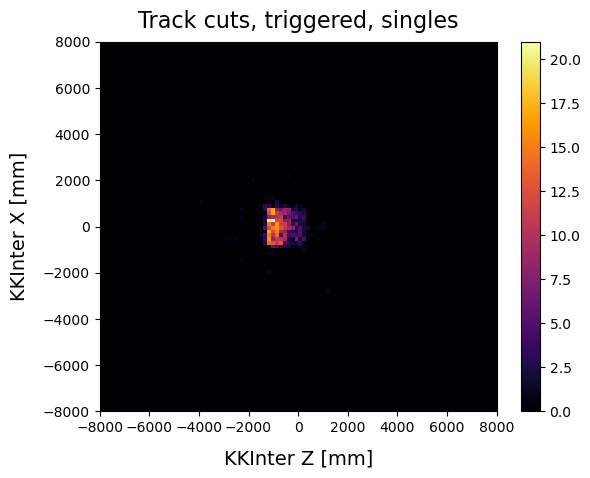


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZX_track_cuts_triggered_singles.png


<Figure size 640x480 with 0 Axes>

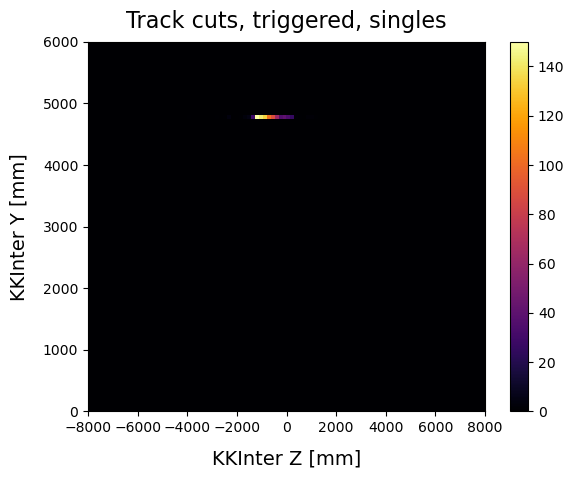


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZY_track_cuts_triggered_singles.png


<Figure size 640x480 with 0 Axes>

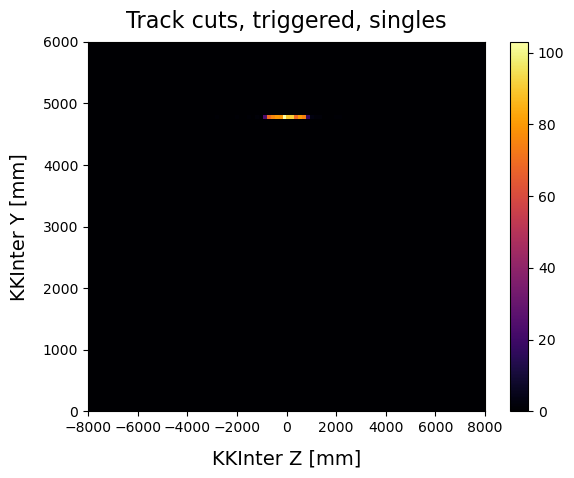


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_XY_track_cuts_triggered_singles.png


<Figure size 640x480 with 0 Axes>

In [16]:
'''
Now introduce the singles cut
'''

#  Events with ONE coincidence in sectors 2 & 3 
#  AND no more than one coincidence in sector 1 (with default coin conditions) 
def FilterSingles(data_, fail=False, quiet=False):
    
    if not quiet: print(f"\n---> Filtering singles") 

    sector1Condition = data_["crv"]["crvcoincs.sectorType"] == 1
    sector2Condition = data_["crv"]["crvcoincs.sectorType"] == 2
    sector3Condition = data_["crv"]["crvcoincs.sectorType"] == 3

    oneOrZeroCoincInMeasurementSector = ak.count(data_["crv"]["crvcoincs.sectorType"][sector1Condition], axis=1) < 2
    oneCoincInSector2Condition = ak.count(data_["crv"]["crvcoincs.sectorType"][sector2Condition], axis=1) == 1
    oneCoincInSector3Condition = ak.count(data_["crv"]["crvcoincs.sectorType"][sector3Condition], axis=1) == 1
    
    data_["oneOrZeroCoincInMeasurementSector"] = oneOrZeroCoincInMeasurementSector 
    data_["oneCoinInTriggerSectors"] = (oneCoincInSector2Condition & oneCoincInSector3Condition)
    data_["pass_singles"] = (oneOrZeroCoincInMeasurementSector & oneCoincInSector2Condition & oneCoincInSector3Condition)

    if not quiet: print("Done!")
    
    # Cut on event level
    if not fail: 
        return data_[data_["pass_singles"]]
    else: 
        return data_[~data_["pass_singles"]]

track_cuts_triggered_singles_ = FilterSingles(track_cuts_triggered_)

ut.PrintNEvents(track_cuts_triggered_singles_, 1)

Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts_triggered_singles.png")

Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts_triggered_singles.png")

Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_XY_track_cuts_triggered_singles.png")


---> Filtering singles
Done!
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 516
evtinfo.event: 164140
***** crv *****
crvcoincs.sectorType: [1, 2, 3, 3]
crvcoincs.nLayers [4, 4, 4, 2]
crvcoincs.angle: [-0.189, -6.02e-12, -0.38, 0.334]
crvcoincs.pos.fCoordinates: ([-928, -388, -893, -43.1], [4.77e+03, 4.63e+03, 4.92e+03, 4.95e+03], [-73.2, -437, -111, -437])
crvcoincs.timeStart: [4.24e+04, 4.24e+04, 4.24e+04, 4.24e+04]
crvcoincs.time: [4.24e+04, 4.24e+04, 4.24e+04, 4.24e+04]
crvcoincs.PEs: [537, 423, 544, 246]
crvcoincs.PEsPerLayer[4]: [[130, 132, 131, 144], [80.3, 98.4, 152, 92.4], [...], [0, 0, 109, 136]]
crvcoincs.nHits: [16, 8, 16, 8]
crvcoincsmc.pdgId: [-13, -13, -13, 11]
crvcoincsmc.valid: [True, True, True, True]
crvcoincsmc.primaryE: [3.8e+04, 3.8e+04, 3.8e+04, 3.8e+04]
***** trk *****
kl.status: [1]
kl.nactive: [27]
kl.nhits: [27]
kl.nplanes: [4]
kl.nnullambig: [0]
kl.ndof: [49]
kl.kl.fitc

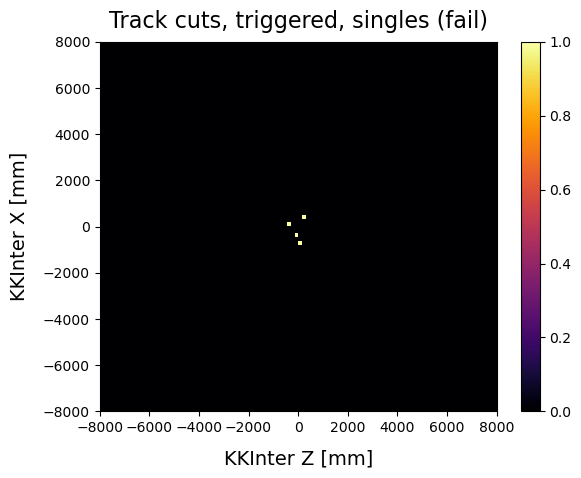


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZX_track_cuts_triggered_singles_fail.png


<Figure size 640x480 with 0 Axes>

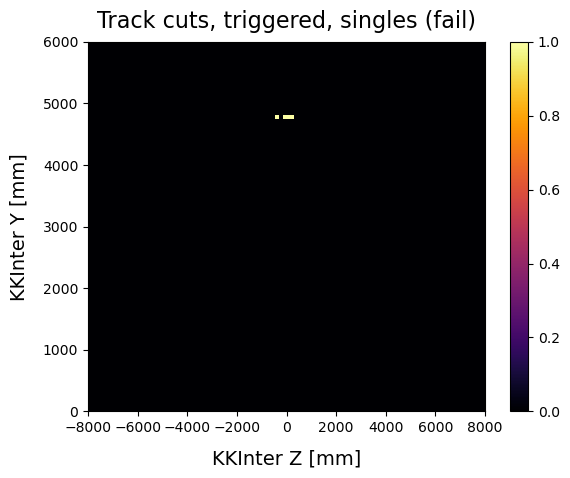


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_ZY_track_cuts_triggered_singles_fail.png


<Figure size 640x480 with 0 Axes>

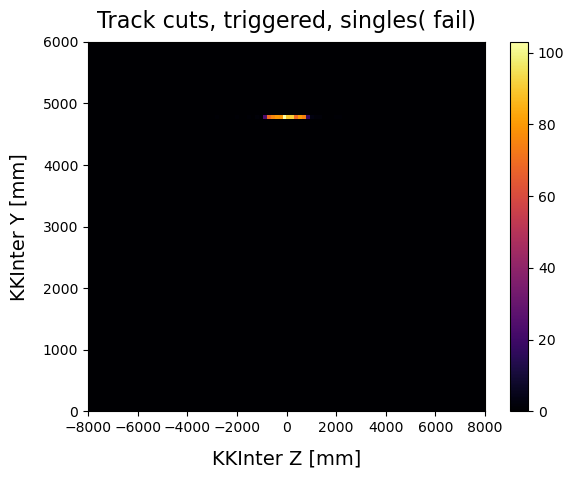


---> Written:
	 ../Images/MDC2020ae/TrackCuts/track_cuts/h2_XY_track_cuts_triggered_singles_fail.png


<Figure size 640x480 with 0 Axes>

In [17]:
'''
Those that fail the singles cut?
'''

track_cuts_triggered_singles_fail_ = FilterSingles(track_cuts_triggered_, fail=True)

ut.PrintNEvents(track_cuts_triggered_singles_fail_, 1)

Plot2D(x=ak.flatten(track_cuts_triggered_singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts_triggered_singles_fail.png")

Plot2D(x=ak.flatten(track_cuts_triggered_singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts_triggered_singles_fail.png")

Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Track cuts, triggered, singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_XY_track_cuts_triggered_singles_fail.png")

In [ ]:
# '''
# No cuts
# '''

# Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#          , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title="No cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_no_cuts.png")

# Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#          , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=3000, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title="No cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_no_cuts.png")

In [ ]:
# '''
# Track cuts
# '''

# track_cuts_ = ApplyTrackerCuts(data_, fail=False)
 
# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#          , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title="Track cuts only", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZX_track_cuts_only.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#          , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=3000, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title="Track cuts only", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/{filters_[1]}/h2_ZY_track_cuts_only.png")